In [3]:
# create descriptive statistics of css.csv
import pandas as pd

# read csv file
df = pd.read_csv('css.csv')
df.head()

,Type,Speaker,Topic,Year
0,Keynote,Michael Macy,Opportunities and challenges for computational...,2015
1,Keynote,Jure Leskovec,Structure and dynamics of information propagation,2015
2,Plenary,"Omar Guerrero, Eduardo Lopez, Robert Axtell",Labor flows and unemployment mediated by networks,2015
3,Keynote,Duncan Watts,An experimental study of collective self-organ...,2015
4,Keynote,Matthew Jackson,Multiplexing and the interaction between borro...,2015


In [18]:
# print the number of rows for each year
print(df['Year'].value_counts())

Year
2024    631
2023    616
2020    436
2019    379
2015    310
2021    280
2018    238
2016    235
2017    213
2022    154
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x11914b5c0>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2025, 0, '2025')])

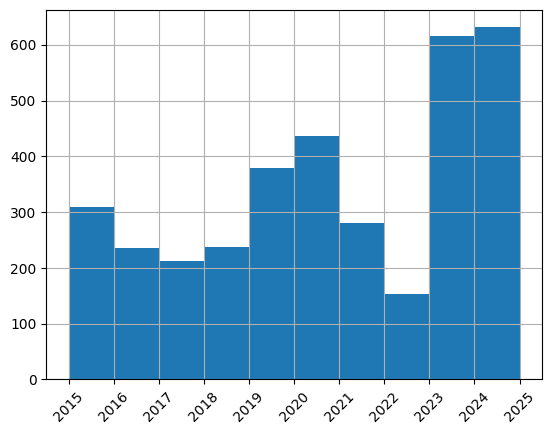

In [ ]:
import matplotlib.pyplot as plt
# sort by year
df = df.sort_values(by='Year')

# create a histogram of the year
# add every year as labels in x-axis 
df['Year'].hist(bins=range(2015, 2026)) # add labels of every column in x-axis
plt.xticks(range(2015, 2025), rotation=45)



<Axes: >

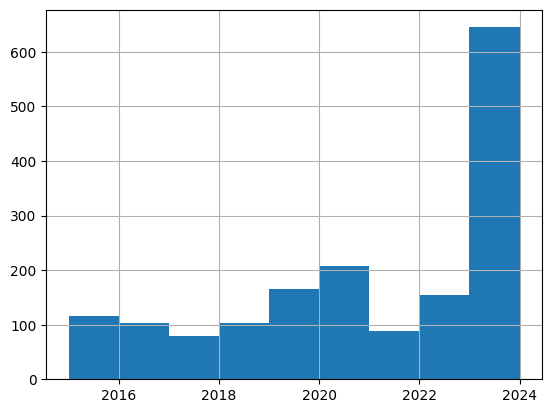

In [7]:
# create a histogram by year if the type is 'Poster' or 'Poster Session'
df[df['Type'].str.contains('Poster')]['Year'].hist(bins=range(2015, 2025))


In [6]:
from collections import Counter

def get_top_keywords(topics_by_year):
    keywords_by_year = {}
    for year, topics in topics_by_year.items():
        year_keywords = []
        for topic in topics:
            # Tokenize topic into words
            words = topic.lower().split(' ')
            # Get word frequencies
            word_freq = Counter(words)
            # Get top 5 words by frequency
            top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]
            year_keywords.extend([word for word, freq in top_words])
        keywords_by_year[year] = year_keywords
    return keywords_by_year

# Get top keywords for each year
topics_by_year = df.groupby('Year')['Topic'].apply(lambda x: ' '.join(x)).to_dict()
keywords_by_year = get_top_keywords(topics_by_year)
# Create a DataFrame with keywords by year
# Find the maximum length of the lists in the dictionary
max_length = max(len(keywords) for keywords in keywords_by_year.values())

# Pad the lists with empty strings to make them all the same length
for year in keywords_by_year:
    keywords_by_year[year] += [''] * (max_length - len(keywords_by_year[year]))

# Create a DataFrame with keywords by year
keywords_df = pd.DataFrame(keywords_by_year)

# Save to CSV
keywords_df.to_csv('keywords.csv', index=False)

# Display the DataFrame
keywords_df.head()


,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,o,e,h,d,u,t,t,i,e,s
1,p,f,y,i,n,e,h,n,x,p
2,p,f,b,s,d,m,e,f,p,e
3,o,e,r,c,e,p,,o,l,e
4,r,c,i,o,r,o,i,r,o,c
